# FFT gyorsulás adatokon

A diszkrét Fourier transzformációt Vinkó Ákos kerékmegcsúszási adatainak elemzésére használjuk fel.

Először is beolvassuk a 0.01 s-os időközre interpolált gyorsulás adatokat az `aint.dat` fájból

In [1]:
from __future__ import unicode_literals
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# segédfüggvény a rajzoláshoz:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
data = np.loadtxt('aint.txt')
nd = data.shape[0]
# adatok száma:
nd

7029

Az első 7028 adatot kiválasztjuk ($a_x$ érintő irányú, $a_y$ sugár irányú gyorsulás) és ábrázoljuk.

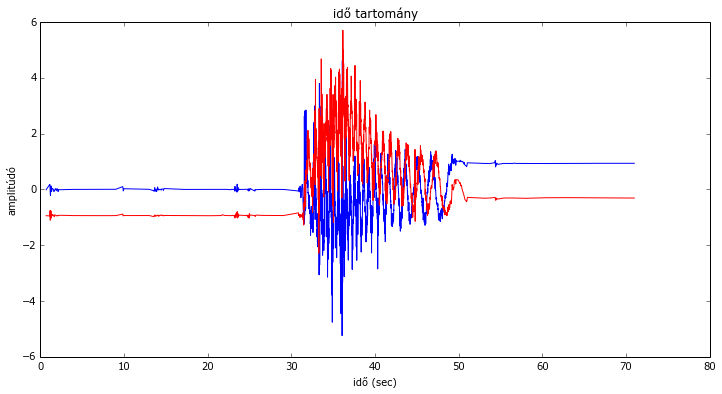

In [2]:
t  = data[:7028,0]
ax = data[:7028,1]
ay = data[:7028,2]
plt.figure()
setup_graph(title='idő tartomány', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.plot(t,ax,'b-')
plt.plot(t,ay,'r-')

### Diszkrét Fourier transzformáció

Kiszámítjuk mindkét adatsorra a valós FFT-t és a transzformált magnitúdóját.

In [3]:
Ax = np.fft.rfft(ax)
Ay = np.fft.rfft(ay)

Axm = [np.sqrt(i.real**2 + i.imag**2)/len(Ax) for i in Ax]
Aym = [np.sqrt(i.real**2 + i.imag**2)/len(Ay) for i in Ay]

# frekvencia tengely
frq = [(i*1.0/nd)*100 for i in range(nd/2+1)]

Ábrázoljuk a magnitúdót

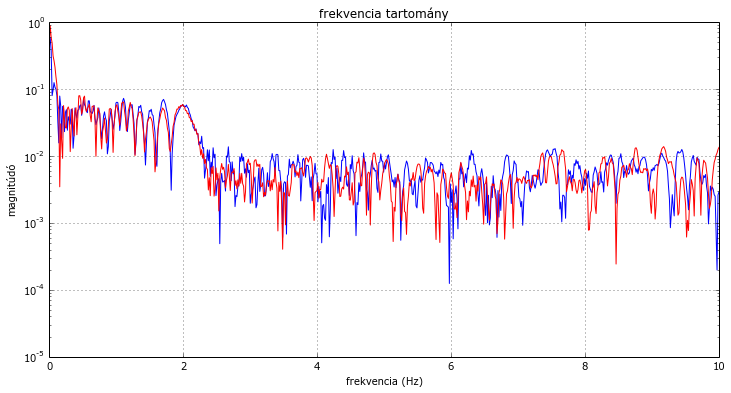

In [4]:
plt.figure()
setup_graph(title='frekvencia tartomány', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.semilogy(frq,Axm,'b-')
plt.semilogy(frq,Aym,'r-')
plt.xlim(0,10)
plt.grid()

Nézzük meg a Blackman-féle ablakolás hatását:

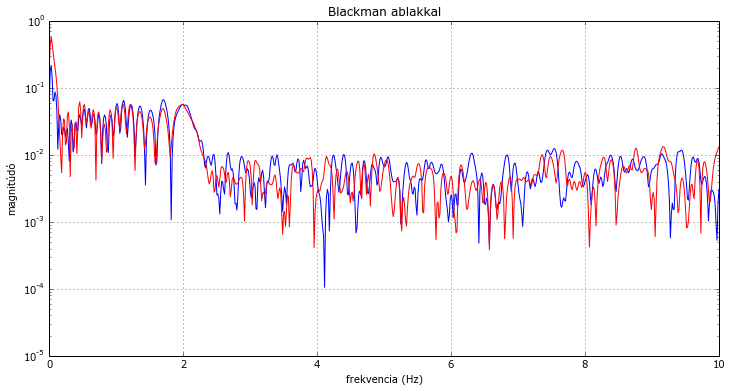

In [5]:
from scipy.signal import blackman
N = len(t)
w = blackman(N)
Ax = np.fft.rfft(ax*w)
Ay = np.fft.rfft(ay*w)

Axm = np.abs(Ax)/len(Ax)
Aym = np.abs(Ay)/len(Ay)

plt.figure()
setup_graph(title='Blackman ablakkal', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.semilogy(frq,Axm,'b-')
plt.semilogy(frq,Aym,'r-')
plt.xlim(0,10)
plt.grid()